In [28]:
import math
import warnings

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.cross_decomposition import PLSRegression

%matplotlib inline
sns.set_style('white')

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

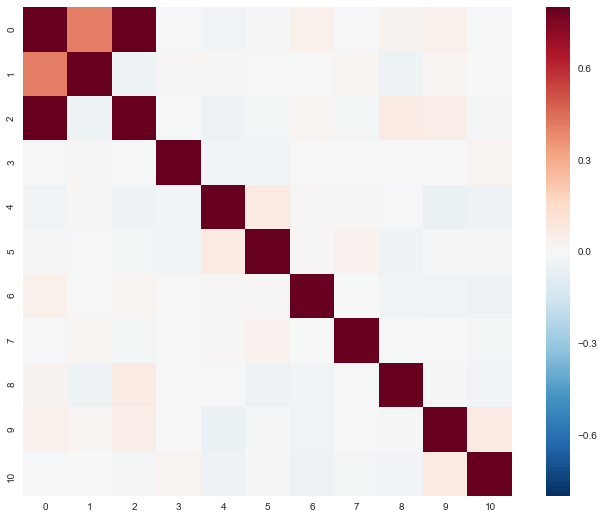

In [29]:
n = 1000 # outcomes
p = 10 # features

# Create random normally distributed data for parameters.
X = np.random.normal(size=n * p).reshape((n, p))

# Create normally distributed outcome related to parameters but with noise.
y = X[:, 0] + 2 * X[:, 1] + np.random.normal(size=n * 1) + 5

# Check out correlations. First column is the outcome.
f, ax = plt.subplots(figsize=(12, 9))
corrmat = pd.DataFrame(np.insert(X, 0, y, axis=1)).corr()

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()


R-squared regression: 0.829158225347
R-squared PLSR: 0.828741984669


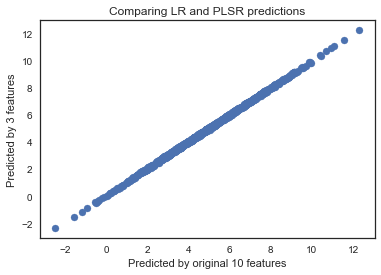

In [30]:
# Fit a linear model with all 10 features.
regr = linear_model.LinearRegression()
regr.fit(X, y)

# Save predicted values.
Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls1 = PLSRegression(n_components=3)

# Reduce X to R(X) and regress on y.
pls1.fit(X, y)

# Save predicted values.
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

R-squared regression: 0.829158225347
R-squared PLSR: 0.828741984669


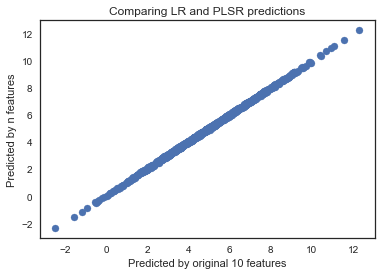

In [31]:
regr  = linear_model.LinearRegression()
regr.fit(X, y)

Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))

pls2 = PLSRegression(n_components=3)

pls2.fit(X, y)

Y_PLS_pred_2 = pls2.predict(X)
print('R-squared PLSR:', pls2.score(X, y))

plt.scatter(Y_pred, Y_PLS_pred_2)
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by n features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

In [32]:
# age
# gender
# income
# city

pls2.x_weights_

array([[ 0.45286722, -0.28573249, -0.38008417],
       [ 0.88786174,  0.06355953,  0.21839964],
       [-0.00917846, -0.03796549,  0.18752471],
       [-0.0334602 , -0.43063898, -0.25302349],
       [-0.01436769, -0.27604022, -0.40033386],
       [ 0.04478307,  0.24280313, -0.44548975],
       [-0.01259055, -0.12918476, -0.18203899],
       [ 0.03392207,  0.44867898, -0.01775037],
       [ 0.04279481,  0.59426321, -0.28965075],
       [-0.00751014, -0.14534086,  0.48225727]])